In [1]:
# example of calculating the frechet inception distance in Keras
import numpy
import os
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from numpy.random import shuffle
from google.colab import drive

In [2]:
def get_unbatched_img(path, image_size, batch_size):
  input = os.path.join(PATH, path)
  img = image_dataset_from_directory(
    input, label_mode=None, image_size=image_size, batch_size=batch_size)
  unbatched = img.unbatch()
  unbatched = list(unbatched.map(lambda x: x))
  unbatched = [x.numpy().astype('float32') for x in unbatched]
  return unbatched
  
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)
 
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

def run(real_path, gan_path, image_size=(64, 64), batch_size=32):
  unbatch_real = get_unbatched_img(real_path, image_size, batch_size)
  unbatch_gan = get_unbatched_img(gan_path, image_size, batch_size)
  # resize images
  images1 = scale_images(unbatch_real, (299,299,3))
  images2 = scale_images(unbatch_gan, (299,299,3))
  # pre-process images
  images1 = preprocess_input(images1)
  images2 = preprocess_input(images2)
  # model
  model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
  # calculate fid
  fid = calculate_fid(model, images1, images2)
  print('FID: %.3f' % fid)
  return fid

In [3]:
drive.mount('/content/drive')
PATH = "/content/drive/MyDrive/Deep_Learning_Project/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
result_dcgan = []

for i in [0, 2, 15, 30, 50, 99]:
  gan_path = 'Evaluation_fake/DCGAN/epoch_' + str(i)
  result_dcgan.append(run('Evaluation_real', gan_path))

Found 9 files belonging to 1 classes.
Found 10 files belonging to 1 classes.
FID: 426.055
Found 9 files belonging to 1 classes.
Found 10 files belonging to 1 classes.
FID: 470.330
Found 9 files belonging to 1 classes.
Found 10 files belonging to 1 classes.
FID: 323.811
Found 9 files belonging to 1 classes.
Found 10 files belonging to 1 classes.
FID: 328.176
Found 9 files belonging to 1 classes.
Found 10 files belonging to 1 classes.
FID: 349.809
Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 272.321


In [5]:
result_wgan = []
for i in [0, 1, 2, 10, 20, 50, 100, 150, 199]:
  gan_path = 'Evaluation_fake/WGAN/epoch_' + str(i)
  result_wgan.append(run('Evaluation_real', gan_path))

Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 307.748
Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 364.440
Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 367.785
Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 318.437
Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 199.415
Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 174.695
Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 180.076
Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 156.873
Found 9 files belonging to 1 classes.
Found 9 files belonging to 1 classes.
FID: 191.229


Text(0.5, 1.0, 'DCGAN - FID Curves')

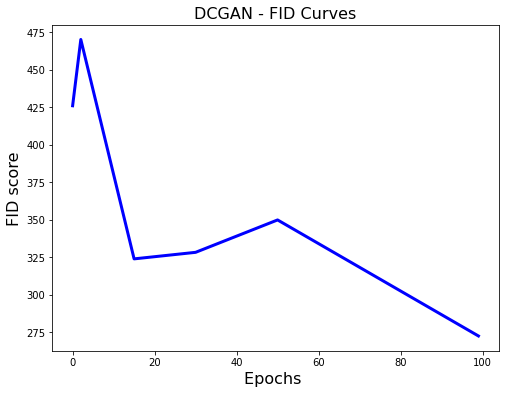

In [6]:
plt.figure(figsize=[8,6])
plt.plot([0, 2, 15, 30, 50, 99], result_dcgan, color='b',linewidth=3.0)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('FID score',fontsize=16)
plt.title('DCGAN - FID Curves',fontsize=16)

Text(0.5, 1.0, 'WGAN - FID Curves')

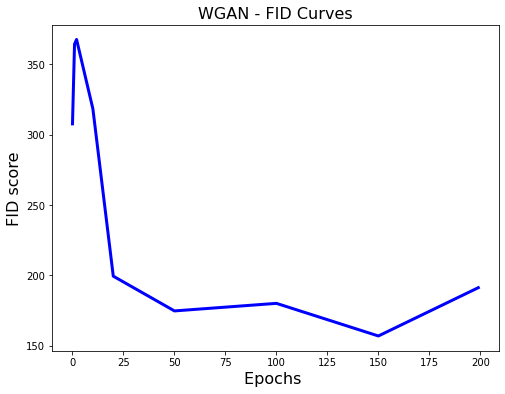

In [7]:
plt.figure(figsize=[8,6])
plt.plot([0, 1, 2, 10, 20, 50, 100, 150, 199], result_wgan, color='b',linewidth=3.0)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('FID score',fontsize=16)
plt.title('WGAN - FID Curves',fontsize=16)